# Problem 1 - Service Data Analysis Using ANOVA

The staff of a service center for electrical appliances include three technicians who specialize in 
repairing three widely used electrical appliances by three different manufacturers. It was desired 
to study the effects of Technician and Manufacturer on the service time. Each technician was 
randomly assigned five repair jobs on each manufacturer's appliance and the time to complete 
each job (in minutes) was recorded. The data for this particular experiment is thus attached.

### Importing all necessary libraries

In [177]:
import numpy as np                                            
import pandas as pd                                           
import seaborn as sns                                         
from statsmodels.formula.api import ols                       
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline                                           

### Importing the dataset

In [178]:
df1 = pd.read_csv('Service_ANOVA (1).csv')

### Checking the top 5 records

In [179]:
df1.head()

,Technician,Manufacturer,Job,Service Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


### Checking the shape and information of the dataset

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


### Checking the summary of the dataframe

In [181]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Technician,45.0,2.000000,0.825723,1.0,1.0,2.0,3.0,3.0
Manufacturer,45.0,2.000000,0.825723,1.0,1.0,2.0,3.0,3.0
Job,45.0,3.000000,1.430194,1.0,2.0,3.0,4.0,5.0
Service Time,45.0,55.822222,8.448477,39.0,50.0,56.0,62.0,70.0


In [182]:
df1['Manufacturer'].unique()

array([1, 2, 3], dtype=int64)

In [183]:
df1['Manufacturer'].nunique()

3

In [184]:
df1['Technician'].unique()

array([1, 2, 3], dtype=int64)

In [185]:
df1['Technician'].nunique()

3

In [186]:
df1['Job'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [187]:
df1['Job'].nunique()

5

In [188]:
# Rename 'Service Time' column to 'ServiceTime'
dfnew = df.rename(columns={'Service Time': 'ServiceTime'})
dfnew

,Technician,Manufacturer,Job,ServiceTime
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69
5,1,2,1,57
6,1,2,2,45
7,1,2,3,39
8,1,2,4,54
9,1,2,5,44


In [189]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   ServiceTime   45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [190]:
dfnew.head()

,Technician,Manufacturer,Job,ServiceTime
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


In [191]:
dfnew.describe(include='all')

,Technician,Manufacturer,Job,ServiceTime
count,45.000000,45.000000,45.000000,45.000000
mean,2.000000,2.000000,3.000000,55.822222
std,0.825723,0.825723,1.430194,8.448477
min,1.000000,1.000000,1.000000,39.000000
25%,1.000000,1.000000,2.000000,50.000000
50%,2.000000,2.000000,3.000000,56.000000
75%,3.000000,3.000000,4.000000,62.000000
max,3.000000,3.000000,5.000000,70.000000


## Q1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘Manufacturer’ and ‘Technician individually.

### The Hypothesis of One Way ANOVA for 'Manufacturer' with respect to 'Service Time'

$H_0$: Service time is not dependent on Manufacturer.

$H_A$: Service time is dependent on Manufacturer.

### The Hypothesis of One Way ANOVA for 'Technician' with respect to 'Service Time'

$H_0$: Service time is not dependent on Technician.

$H_A$: Service time is dependent on Technician.

Where,

$H_0$ = Null Hypothesis

$H_A$ = Alternate Hypothesis

Also, it is given that the dataset qualifies all the assumptions for ANOVA.
- Each group sample is drawn from a normally distributed population
- All populations have a common variance
- All samples are drawn independently of each other
- Within each sample, the observations are sampled randomly and independently of each other
- Factor effects are additive

## Q1.2) Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [205]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [206]:
formula = 'ServiceTime ~ C(Manufacturer)'
model = ols(formula, dfnew).fit()
aov_table = anova_lm(model)
print(aov_table)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.191029  0.826822
Residual         42.0  3112.266667  74.101587       NaN       NaN


Since the p value is more than the significance level, we fail to reject the null hupothesis and state that ServiceTime is not dependent on Manufacture 

<AxesSubplot:xlabel='Manufacturer', ylabel='ServiceTime'>

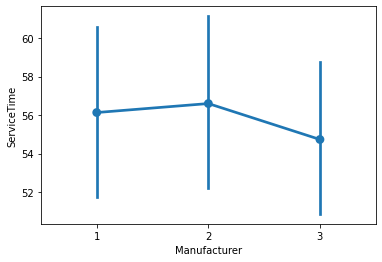

In [207]:
sns.pointplot(x='Manufacturer', y='ServiceTime', data=dfnew)

H0: Service time is not dependent on Technician.

Ha: Service time is dependent on Technician
    

## Q1.3)Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results. 

In [208]:
formula = 'ServiceTime ~ C(Technician)'
model = ols(formula, dfnew).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df       sum_sq    mean_sq        F    PR(>F)
C(Technician)   2.0    24.577778  12.288889  0.16564  0.847902
Residual       42.0  3116.000000  74.190476      NaN       NaN


Since the p value is more than the significance level, we fail to reject the null hupothesis and state that ServiceTime is not dependent on Technician.

<AxesSubplot:xlabel='Technician', ylabel='ServiceTime'>

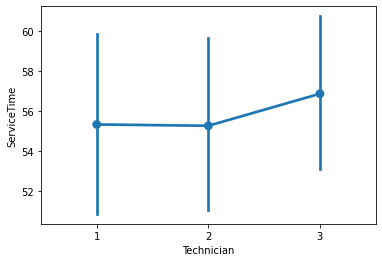

In [209]:
sns.pointplot(x='Technician', y='ServiceTime', data=dfnew)

H0: ServiceTime is not dependent on at least one of the treatments

H1: ServiceTime is dependent on both treatments

## Q1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python] ?

In [201]:
from statsmodels.stats.multicomp import MultiComparison

In [202]:
mc = MultiComparison(dfnew['ServiceTime'],dfnew['Manufacturer'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4667    0.9 -7.1696  8.103  False
     1      3     -1.4 0.8922 -9.0363 6.2363  False
     2      3  -1.8667 0.8077  -9.503 5.7696  False
---------------------------------------------------


In [203]:
mc = MultiComparison(dfnew['ServiceTime'],dfnew['Technician'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0667    0.9 -7.7075 7.5742  False
     1      3   1.5333 0.8682 -6.1075 9.1742  False
     2      3      1.6 0.8562 -6.0409 9.2409  False
---------------------------------------------------


### Method-2: Point Plot of Manufacturer vs ServiceTime

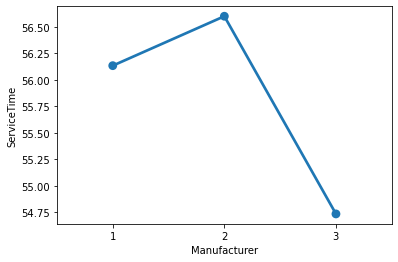

In [169]:
sns.pointplot(x='Manufacturer', y='ServiceTime', data=dfnew, ci=None);

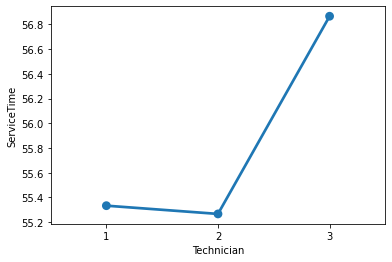

In [204]:
sns.pointplot(x='Technician', y='ServiceTime', data=dfnew, ci=None);

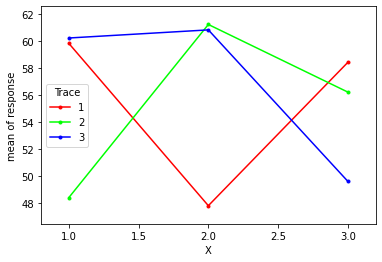

In [197]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(dfnew['Manufacturer']),np.array(dfnew['Technician']),np.array(dfnew['ServiceTime']));

<AxesSubplot:xlabel='Technician', ylabel='ServiceTime'>

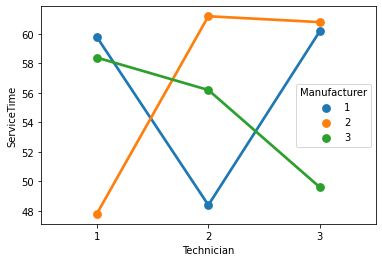

In [198]:
sns.pointplot(x='Technician', y='ServiceTime', data=dfnew, hue = 'Manufacturer' , ci=None)

<AxesSubplot:xlabel='Manufacturer', ylabel='ServiceTime'>

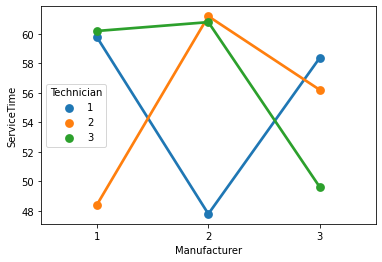

In [199]:
sns.pointplot(x='Manufacturer', y='ServiceTime', data=dfnew, hue = 'Technician' , ci=None)

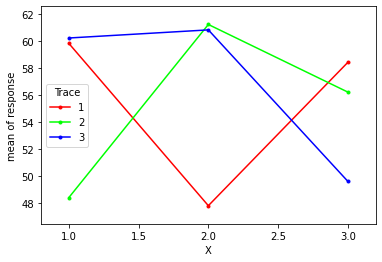

In [210]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(dfnew['Manufacturer']),np.array(dfnew['Technician']),np.array(dfnew['ServiceTime']));

<AxesSubplot:xlabel='Manufacturer', ylabel='ServiceTime'>

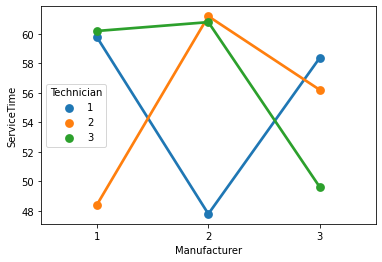

In [211]:
sns.pointplot(x='Manufacturer', y='ServiceTime', data=dfnew, hue = 'Technician' , ci=None)

<AxesSubplot:xlabel='Technician', ylabel='ServiceTime'>

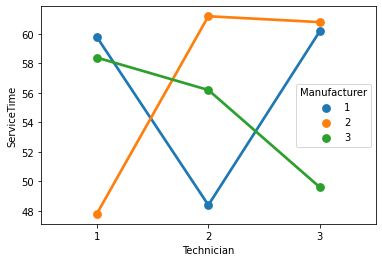

In [212]:
sns.pointplot(x='Technician', y='ServiceTime', data=dfnew, hue = 'Manufacturer' , ci=None)

### Q1.5 Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with respect to the variable ‘Service Time’ and state your results?

### Two Way ANOVA without the interaction effect terms

In [174]:
formula = 'ServiceTime ~ C(Manufacturer) + C(Technician)'
model = ols(formula, dfnew).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Manufacturer),2.0,28.311111,14.155556,0.183381,0.833147
C(Technician),2.0,24.577778,12.288889,0.159199,0.853365
Residual,40.0,3087.688889,77.192222,NaN,NaN


### Two Way ANOVA with the interaction effect terms

In [176]:
formula = 'ServiceTime ~ C(Manufacturer) + C(Technician) + C(Manufacturer):C(Technician)'
model = ols(formula, dfnew).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Manufacturer),2.0,28.311111,14.155556,0.272164,0.763283
C(Technician),2.0,24.577778,12.288889,0.236274,0.790779
C(Manufacturer):C(Technician),4.0,1215.288889,303.822222,5.841487,0.000994
Residual,36.0,1872.400000,52.011111,NaN,NaN


## Q1.6) Mention the business implications of performing ANOVA for this particular case study?

Details Mentioned at Report 

# Problem 2 - EDA & PCA 

Problem Statement: The ‘Hair Salon.csv’ dataset contains various variables used for the 
context of Market Segmentation. This particular case study is based on various parameters of a 
salon chain of hair products. You are expected to do Principal Component Analysis for this case 
study according to the instructions given in the following rubric.

### Importing all necessary libraries

In [2]:
import pandas as pd               # For Dataframe manipultion
import numpy as np                # For numerical calculation & arrays
import matplotlib.pyplot as plt   # For visualization
import seaborn as sns             # For visualization
import warnings                   
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
df = pd.read_csv('Hair Salon_PCA (1).csv')

## Q2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented. 

### Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:
- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

In [4]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Presence of null values:',df.isnull().sum().any())

Number of duplicate rows = 0
Presence of null values: False


### Observations of basic Data Exploration:

- Dataset has 13 columns and 100 rows.
- The entire dataset is of float data type. However, column 'ID' is Integer datatype.
- No duplicate records.
- No null values.
- We have to investigate further for outliers.

### Outlier Identification

In [8]:
cat = []
nums = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        nums.append(i)

nums

['ID',
 'ProdQual',
 'Ecom',
 'TechSup',
 'CompRes',
 'Advertising',
 'ProdLine',
 'SalesFImage',
 'ComPricing',
 'WartyClaim',
 'OrdBilling',
 'DelSpeed',
 'Satisfaction']

In [9]:
newdf = df[nums]

### Univariate Analysis
#### Boxplot to see the value range & variation of all variables.

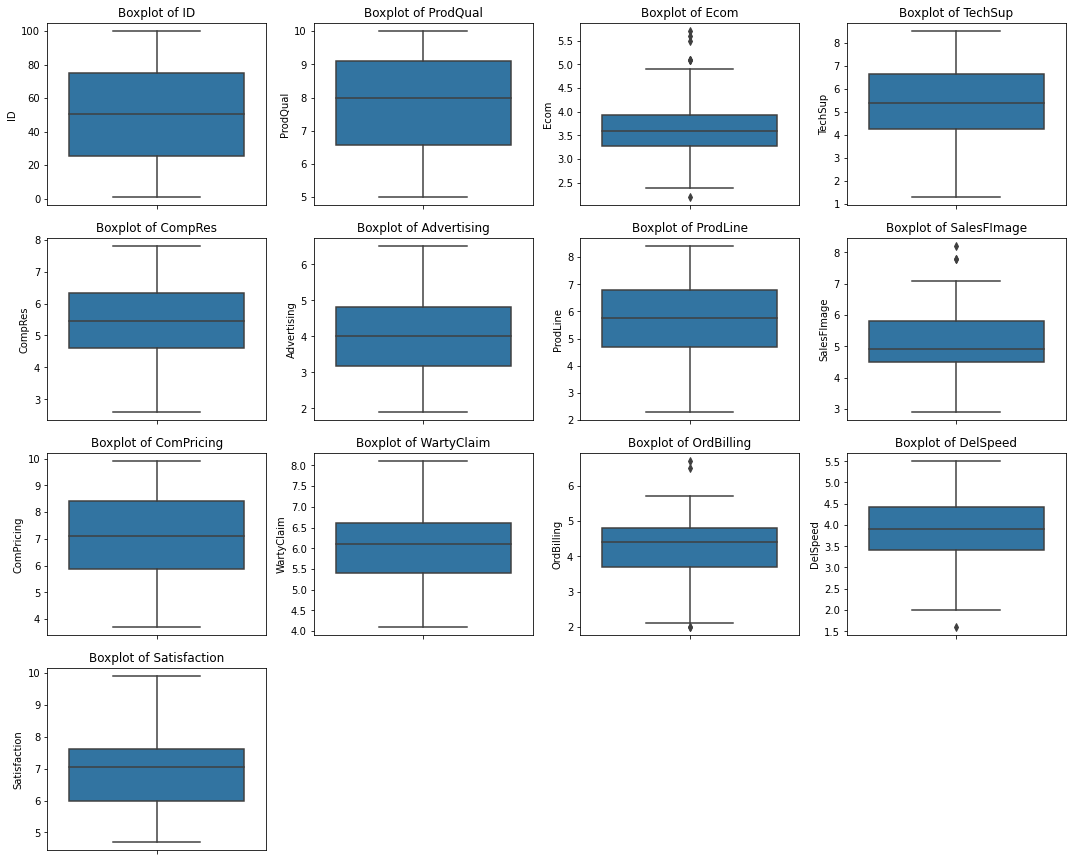

In [10]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = newdf[feature_list[i]], data = newdf)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Distplot to check the kind of value distribution of each variable.

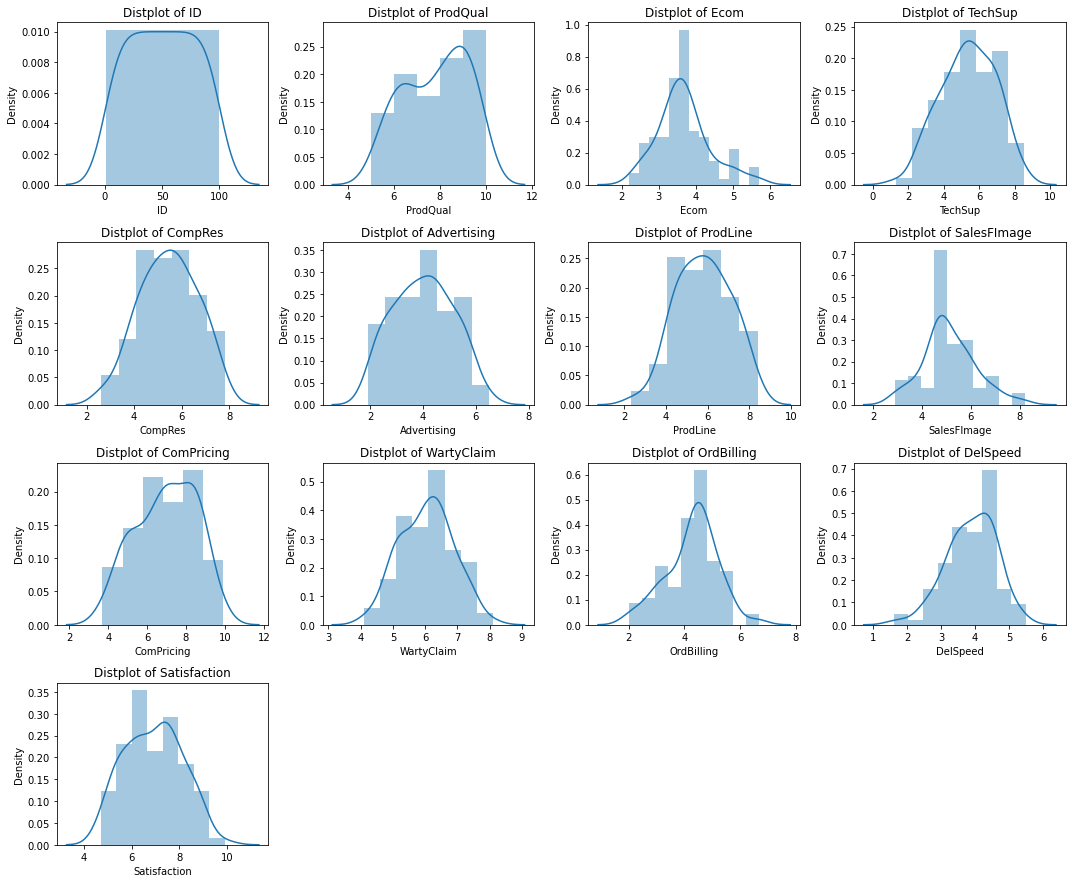

In [11]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.distplot(newdf[newdf.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Observations:

- The variables Prodqual have a slightly left-skewed distribution.
- As we can see that all distribution have a normal distribution.

### Multivariate Analysis

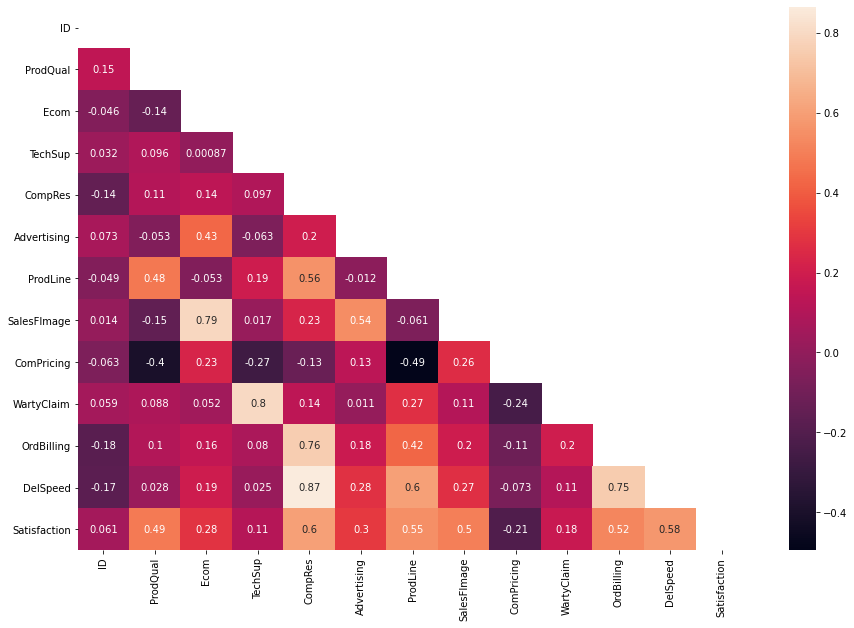

In [12]:
plt.figure(figsize=(15,10));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

#### Observations:
- Variable ProdQual with Techsup, Techsup with Compres, Compres with Delspeed have a strong correlation with one another.

## Q2.2) Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [13]:
from scipy.stats import zscore
df_pca_scaled = newdf.apply(zscore)
df_pca_scaled.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-1.714816,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,-1.680173,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,-1.645531,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.610888,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,-1.576245,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


## Q2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

### Correlation Matrix

In [14]:
corr1 = df_pca_scaled.corr()
corr1.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263


### Covariance matrix

In [15]:
covar = df_pca_scaled.cov()
covar.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.010101,0.147247,-0.046640,0.032160,-0.145780,0.073868,-0.049132,0.013988,-0.063643,0.059184,-0.180154,-0.173873,0.061761
ProdQual,0.147247,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998,0.491237
Ecom,-0.046640,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572,0.285601
TechSup,0.032160,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698,0.113735
CompRes,-0.145780,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830,0.609356


- From the above two tables we can say that there is a slight or negligible difference in their values. This is because the dataset considered to caluclate covariance & correlation is already scaled. If the dataset wouldn't have been scaled the covariance matrix would have differed a lot.
- Both Correlation and Covariance are very closely related to each other and yet they differ a lot. When it comes to choosing between Covariance vs Correlation, the latter stands to be the first choice as it remains unaffected by the change in dimensions, location, and scale, and can also be used to make a comparison between two pairs of variables.

## Q2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise. 

### Dataset before scaling

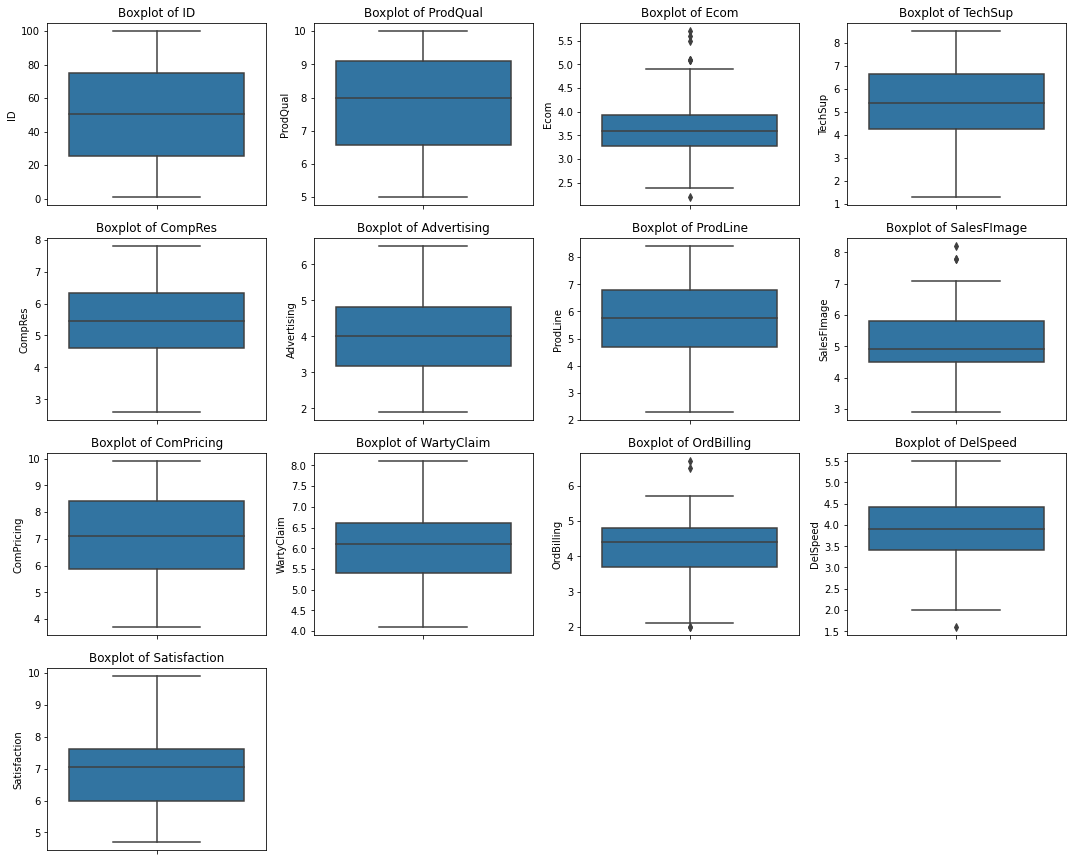

In [16]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = newdf[feature_list[i]], data = newdf)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Dataset after scaling

In [17]:
df_pca_scaled.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-1.714816,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,-1.680173,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,-1.645531,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.610888,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,-1.576245,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474


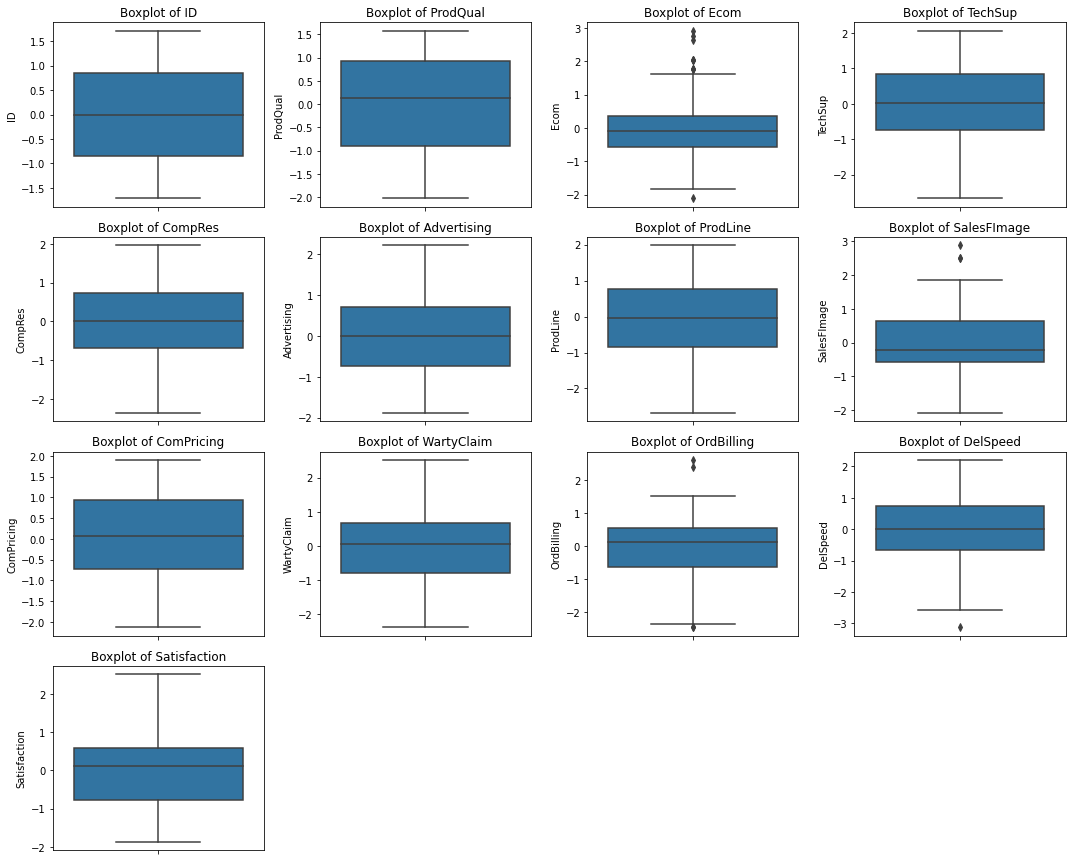

In [18]:
plt.figure(figsize=(15,15))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

From the above two graphs, we can say that:
- There is no difference in outliers of the dataset before & after scaling. Scaling of data just transforms all variables in the dataset to a same range and it has no effect whatsoever on outliers in the dataset.

## Q2.5) Build the covariance matrix, eigenvalues and eigenvector.

In [19]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=13, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [20]:
#Extract eigen vectors
pca.components_

array([[ 0.04659362, -0.15527921, -0.16649956, -0.12357735, -0.42372779,
        -0.17945503, -0.35204872, -0.21735578,  0.13280731, -0.17304207,
        -0.38957753, -0.42388058, -0.41081139],
       [-0.04983935, -0.31871546,  0.43719256, -0.24176757,  0.00333435,
         0.35166727, -0.2983661 ,  0.45952847,  0.4200957 , -0.20560727,
         0.01190881,  0.05703423,  0.01812171],
       [-0.23101384,  0.00350694, -0.24857742, -0.56970117,  0.21422033,
        -0.13320679,  0.10241352, -0.26689457,  0.06735008, -0.56554168,
         0.18313799,  0.23758551, -0.02355175],
       [ 0.49737305,  0.52458938,  0.08627072, -0.29368824, -0.17225577,
         0.20753035,  0.09192432,  0.12748761, -0.16813296, -0.28042302,
        -0.22041485, -0.18178685,  0.31265255],
       [-0.77967247,  0.30438026,  0.30202119, -0.01164363, -0.20503738,
        -0.11194799,  0.09999132,  0.15296919, -0.19120973, -0.0709626 ,
        -0.17007695, -0.19698481,  0.10399316],
       [-0.11581052, -0.262055

In [21]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([4.09031163, 2.58246009, 1.74408311, 1.38449513, 0.84530284,
       0.63737703, 0.55277881, 0.40687424, 0.32136047, 0.23782883,
       0.14469341, 0.10013442, 0.08361313])

In [22]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13'],
                                    index = df_pca_scaled.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
ID,0.046594,-0.049839,-0.231014,0.497373,-0.779672,-0.115811,-0.243429,0.006709,-0.105315,-0.033305,-0.036423,0.002614,0.021445
ProdQual,-0.155279,-0.318715,0.003507,0.524589,0.304380,-0.262056,0.400256,0.122421,-0.293997,-0.186873,0.207746,0.227753,0.214952
Ecom,-0.166500,0.437193,-0.248577,0.086271,0.302021,-0.090750,-0.413553,0.006979,-0.514420,-0.231315,0.023505,-0.027319,-0.349208
TechSup,-0.123577,-0.241768,-0.569701,-0.293688,-0.011644,-0.052566,0.128092,-0.014305,0.109030,-0.539177,-0.425371,-0.017235,0.110078
CompRes,-0.423728,0.003334,0.214220,-0.172256,-0.205037,-0.058764,-0.037928,-0.002995,0.138158,-0.442537,0.580027,-0.379275,0.052284
Advertising,-0.179455,0.351667,-0.133207,0.207530,-0.111948,0.692778,0.513007,-0.074916,-0.090013,-0.036732,-0.023960,-0.097049,-0.051053
ProdLine,-0.352049,-0.298366,0.102414,0.091924,0.099991,0.062538,-0.166390,-0.634600,-0.225018,0.229520,-0.253819,-0.347299,0.188243
SalesFImage,-0.217356,0.459528,-0.266895,0.127488,0.152969,-0.108868,-0.175426,0.023585,0.329855,0.179643,0.052358,0.071664,0.662245
ComPricing,0.132807,0.420096,0.067350,-0.168133,-0.191210,-0.581068,0.486058,-0.344431,-0.155300,0.026447,-0.088112,-0.106337,-0.010087
WartyClaim,-0.173042,-0.205607,-0.565542,-0.280423,-0.070963,-0.047361,0.124318,-0.040385,-0.122269,0.498121,0.456189,0.082297,-0.164281


## Q2.6) Write the explicit form of the first PC (in terms of Eigen Vectors)?

### Explicit form of the first PC

In [23]:
for i in range (0,13):
    print("({} * {})+".format(round(df_extracted_loadings.iloc[i,0],2),round(df_pca_scaled.iloc[0,i],2)),end=" ")

(0.05 * -1.71)+ (-0.16 * 0.5)+ (-0.17 * 0.33)+ (-0.12 * -1.88)+ (-0.42 * 0.38)+ (-0.18 * 0.7)+ (-0.35 * -0.69)+ (-0.22 * 0.82)+ (0.13 * -0.11)+ (-0.17 * -1.65)+ (-0.39 * 0.78)+ (-0.42 * -0.25)+ (-0.41 * 1.08)+ 

## Q2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

Cumulative values of eigen values help us decide the optimum number of principal components by considering the cumlative explained variance ratio with a certain confidence interval.

In this case, we take confidence level as 85%, hence, we use 7 principal components.

In [27]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
ID,0.046594,-0.049839,-0.231014,0.497373,-0.779672,-0.115811,-0.243429
ProdQual,-0.155279,-0.318715,0.003507,0.524589,0.304380,-0.262056,0.400256
Ecom,-0.166500,0.437193,-0.248577,0.086271,0.302021,-0.090750,-0.413553
TechSup,-0.123577,-0.241768,-0.569701,-0.293688,-0.011644,-0.052566,0.128092
CompRes,-0.423728,0.003334,0.214220,-0.172256,-0.205037,-0.058764,-0.037928
Advertising,-0.179455,0.351667,-0.133207,0.207530,-0.111948,0.692778,0.513007
ProdLine,-0.352049,-0.298366,0.102414,0.091924,0.099991,0.062538,-0.166390
SalesFImage,-0.217356,0.459528,-0.266895,0.127488,0.152969,-0.108868,-0.175426
ComPricing,0.132807,0.420096,0.067350,-0.168133,-0.191210,-0.581068,0.486058
WartyClaim,-0.173042,-0.205607,-0.565542,-0.280423,-0.070963,-0.047361,0.124318


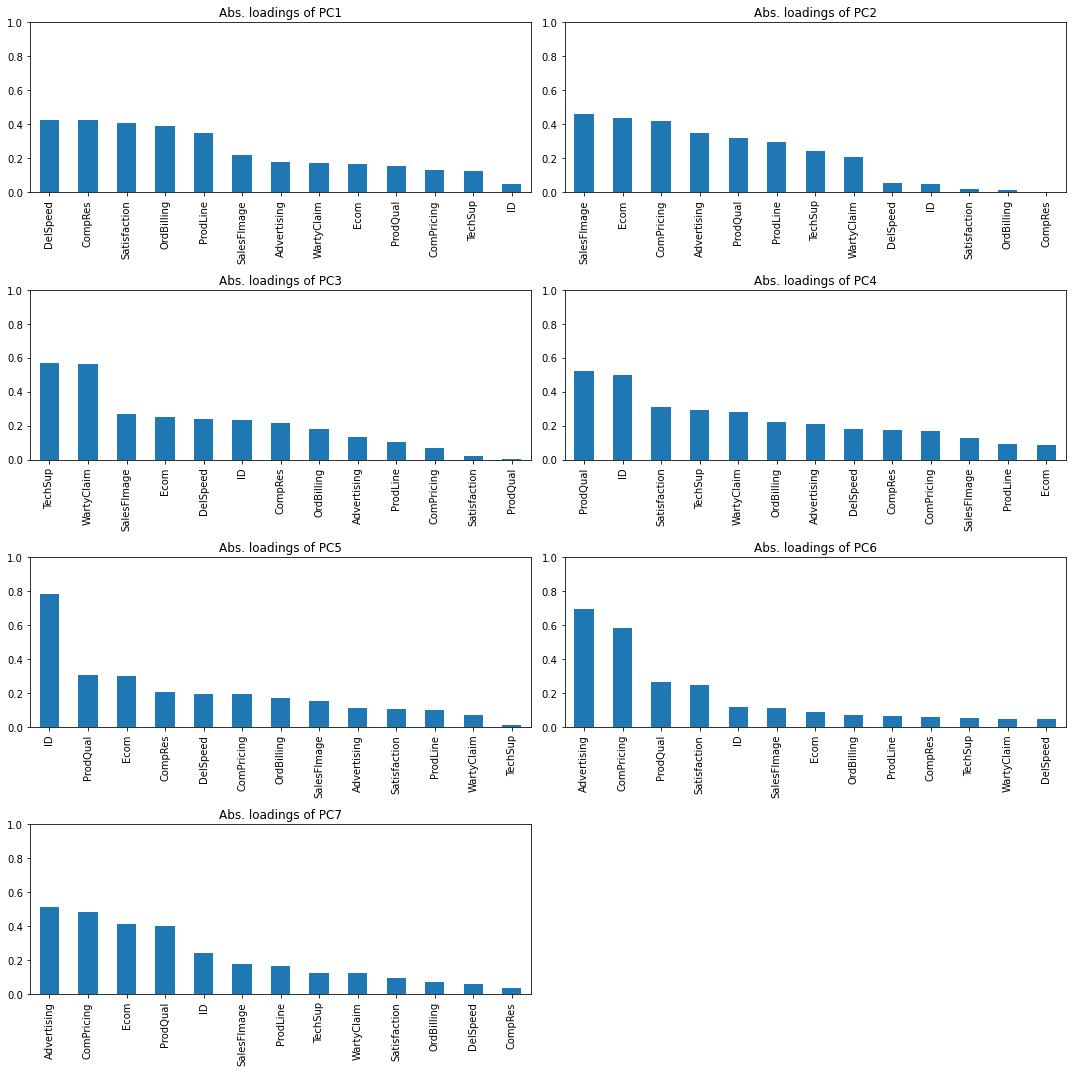

In [28]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,15))
for i in range(len(df_selected.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

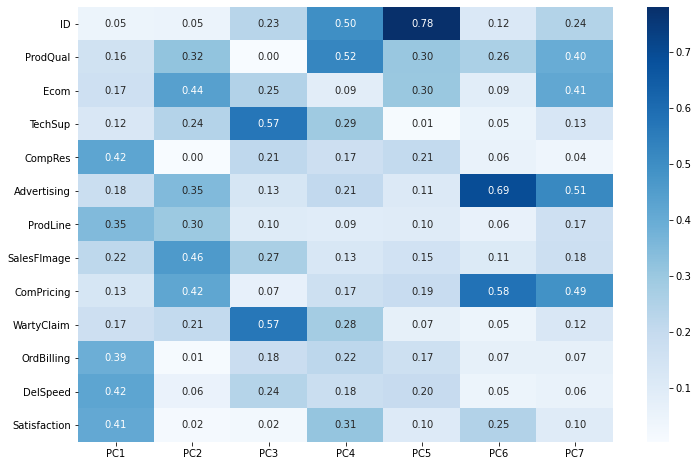

In [29]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

- Principal Component Analysis in this case study reduced the dimensionality of the dataset from 17 to 7 as it gives us better perspective and less complexity.
- It helps in minimizing redundant data and helps in refining useful data as when we use process-intensive algorithms (like many supervised algorithms) on the data so we need to get rid of redundancy.
- PCA gave us linearly independent and different combinations of features which we can further to describe our data differently as it gives a whole new perspective.

  7 Principal Components are enough to perform further analysis (as they cover 90% of variance of the dataset).

### 2.8) Mention the business implication of using the Principal Component Analysis for this case

Observation Mentioned Above 


## THE END